Contents

1. Importing Libraries & Data Set
2. Exploring Relationships
3. Country Subset Exploration
4. Box Plots

# 1. Importing Libraries & Data Set

In [85]:
# Import Libraries

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from dateutil import parser
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

In [2]:
# Set path

path = r'/Users/danioprea/Desktop/Data Analytics/Coffee Quality Analysis - Dani Oprea'

In [3]:
# Import data set with pandas

df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'coffee_final.pkl'))

In [4]:
# This ensures the charts we create are displayed in the notebook without the need to "call" them specifically.
    
%matplotlib inline

In [5]:
df.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,10.0,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating


In [6]:
df.shape

(197, 28)

# 2. Exploring Relationships

#### Look at Altitude Outliers

In [7]:
df_alt = df[df['Altitude'] > 3000]

In [8]:
df_alt

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
47,Guatemala,PEÑA BLANCA,"OLAM AGRO GUATEMALA, S.A.",4700.0,Santa Rosa,PABLO CHUY,632,30 kg,2022 / 2023,2023-02-23,...,10.0,7.83,85.00,11.3,0,0,green,4,"February 23rd, 2024",Middle Rating
60,Guatemala,SAN RAFAEL URIAS VALDES,"VALBROS, S. A.",4895.0,ANTIGUA GUATEMALA,"VALBROS, S. A.",66,30 kg,2021 / 2022,2022-05-19,...,10.0,7.83,84.67,10.9,0,3,yellow-green,2,"May 19th, 2023",Middle Rating
99,Guatemala,SAN RAFAEL URIAS VALDES,Asociación Nacional del Cafe,5272.5,ANTIGUA GUATEMALA,"VALBROS, S. A.",635,30 kg,2021 / 2022,2022-05-19,...,10.0,7.75,83.83,10.9,0,1,greenish,4,"May 19th, 2023",Middle Rating
182,Vietnam,Gaia Farms,Brew Baby Coffee Company,5400.0,Lam Dong Province,Viet Coffee Company Limited,1,1 kg,2022 / 2023,2023-04-10,...,10.0,7.33,81.83,11.2,0,0,green,4,"April 9th, 2024",Low Rating


In [9]:
df[df['Country of Origin'] == 'Guatemala']

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
11,Guatemala,Karen Acajabon Coffee Farm,Taiwan Coffee Laboratory,2000.0,Acatenango,Karen Acajabon,5,15 kg,2021,2022-11-15,...,10.0,8.00,86.25,11.5,0,0,brownish,1,"November 15th, 2023",High Rating
20,Guatemala,Finca Vista Hermosa,Taiwan Coffee Laboratory,1900.0,"Guatemala, Fraijanes, Santa Rosa",Fredy Orantes,8,30 kg,2021 / 2022,2022-11-15,...,10.0,8.08,85.75,11.6,0,0,yellowish,0,"November 15th, 2023",High Rating
46,Guatemala,varias fincas,"Peter Schoenfeld, S.A.",1600.0,Antigua,Varios productores,600,30 kg,2022 / 2023,2023-04-17,...,10.0,7.83,85.00,9.9,0,1,green,1,"April 16th, 2024",Middle Rating
47,Guatemala,PEÑA BLANCA,"OLAM AGRO GUATEMALA, S.A.",4700.0,Santa Rosa,PABLO CHUY,632,30 kg,2022 / 2023,2023-02-23,...,10.0,7.83,85.00,11.3,0,0,green,4,"February 23rd, 2024",Middle Rating
48,Guatemala,san francisco cotzal,"inmobiliaria e inversiones dos mil, s.a.",1600.0,quiche,san francisco cotzal,275,69 kg,2021 / 2022,2022-06-22,...,10.0,7.92,84.92,11.7,0,3,green,1,"June 22nd, 2023",Middle Rating
59,Guatemala,Varias Fincas,"Peter Schoenfeld, S.A.",1600.0,Huehuetenango,Varios Productores,600,30 kg,2022 / 2023,2023-04-28,...,10.0,7.92,84.67,10.6,0,0,green,1,"April 27th, 2024",Middle Rating
60,Guatemala,SAN RAFAEL URIAS VALDES,"VALBROS, S. A.",4895.0,ANTIGUA GUATEMALA,"VALBROS, S. A.",66,30 kg,2021 / 2022,2022-05-19,...,10.0,7.83,84.67,10.9,0,3,yellow-green,2,"May 19th, 2023",Middle Rating
74,Guatemala,Finca Alta Luz,"Retrillas del pacifico, s.a.",1350.0,Huehuetenango,Maria de los Angeles Perez,600,30 kg,2022 / 2023,2023-04-26,...,10.0,7.75,84.33,9.2,0,1,green,5,"April 25th, 2024",Middle Rating
80,Guatemala,San jose del lago,"Peter Schoenfeld, S.A.",1600.0,Atitlán,"Cafetalera Paquim, S.A.",55,30 kg,2022 / 2023,2023-04-17,...,10.0,7.75,84.25,10.0,0,0,green,1,"April 16th, 2024",Middle Rating


In [10]:
df[df['Country of Origin'] == 'Vietnam']

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
67,Vietnam,CupnCare,Taiwan Coffee Laboratory,650.0,Quang Tri,TONG PHUC LAM TRADING SERVICES COMPANY LIMITED,3,5 kg,2021 / 2022,2022-11-15,...,10.0,7.92,84.58,11.6,0,0,brownish,0,"November 15th, 2023",Middle Rating
146,Vietnam,Ea tan Cooperative,SIMEXCO DAKLAK LTD,900.0,"Eatan Commune, Krong Nang District, Krong Nang...",Ea Tan Cooperative,22,60 kg,2021 / 2022,2022-06-03,...,10.0,7.33,82.83,13.3,0,0,green,4,"June 3rd, 2023",Middle Rating
164,Vietnam,Apollo Estate,"Sunvirtue Co., Ltd.",1040.0,Dalat,"Yeh,Li Chuan",77,15 kg,2021,2022-06-01,...,10.0,7.58,82.33,10.5,0,0,blue-green,0,"June 1st, 2023",Middle Rating
182,Vietnam,Gaia Farms,Brew Baby Coffee Company,5400.0,Lam Dong Province,Viet Coffee Company Limited,1,1 kg,2022 / 2023,2023-04-10,...,10.0,7.33,81.83,11.2,0,0,green,4,"April 9th, 2024",Low Rating


I was curious if there was anything interesting or significant about the altitude outliers. I wanted to see if they were all from one country - they were not. Then, I wanted to see just how much of they made up of their respective countries total observations in our data. If, for example, the only observations from Guatemala were the three outliers, that may be interesting. However, they made up just 15% of the total data from Guatemala. And we can see from the data, that these altitudes exist at all ranges of quality of coffee. 

#### Calculate Average Total Cup Points by Category

Our initial EDA pointed to some possible characteristics of high-rated coffee. However, this was all done visually. We will now re-examine those characteristics but by finding averages. This should point our second round of analysis into a more focused area.

In [17]:
# Start by looking at the min and max values of the total cup points

df['Total Cup Points'].agg(['min', 'max'])

min    78.00
max    89.33
Name: Total Cup Points, dtype: float64

In [19]:
# Find the averages and count of country of origin

country_avg = df.groupby('Country of Origin')['Total Cup Points'].agg(['mean', 'count', 'std'])
country_avg

,mean,count,std
Country of Origin,,,
Brazil,81.541250,8,2.098234
Colombia,83.781250,16,2.207916
Costa Rica,83.740000,8,1.776079
El Salvador,81.532857,7,1.995551
Ethiopia,84.960909,11,0.983824
Guatemala,84.416500,20,1.090781
Honduras,83.282308,13,0.676771
Indonesia,84.250000,1,NaN
Kenya,83.710000,2,2.177889


I want to check how close in variance the top four countries are. If they're close, then we can use them as a subset.

Null Hypothesis: There is no significant difference in the mean quality ratings of these countries.

In [95]:
# Perform ANOVA
f_statistic, p_value = f_oneway(
    df['Total Cup Points'][df['Country of Origin'] == 'Ethiopia'],
    df['Total Cup Points'][df['Country of Origin'] == 'Tanzania, United Republic Of'],
    df['Total Cup Points'][df['Country of Origin'] == 'Guatemala'],
    df['Total Cup Points'][df['Country of Origin'] == 'Taiwan']
)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 0.7271427487123904
P-value: 0.5383564618888323


Our test proves our null hypothesis. 

In [20]:
    # Find the averages and count of variety

variety_avg = df.groupby('Variety')['Total Cup Points'].agg(['mean', 'count', 'std'])
variety_avg

,mean,count,std
Variety,,,
"BOURBON, CATURRA Y CATIMOR",83.830000,1,NaN
Bourbon,83.754118,17,1.364075
Bourbon Sidra,83.750000,1,NaN
"Bourbon, Catimor, Caturra, Typica",82.670000,1,NaN
Castillo,89.330000,1,NaN
Castillo and Colombia blend,84.330000,1,NaN
"Castillo,Caturra,Bourbon",80.420000,1,NaN
Catimor,82.708000,10,1.729160
"Catimor,Catuai,Caturra,Bourbon",83.670000,1,NaN


In [21]:
# Find the averages and count of processing method

processing_avg = df.groupby('Processing Method')['Total Cup Points'].agg(['mean', 'count', 'std'])
processing_avg

,mean,count,std
Processing Method,,,
Anaerobico 1000h,83.250000,1,NaN
Double Anaerobic Washed,89.330000,1,NaN
Double Carbonic Maceration / Natural,84.750000,1,NaN
"Honey,Mossto",87.080000,1,NaN
Natural / Dry,83.760444,45,2.007237
Pulped natural / honey,83.534783,23,1.350329
SEMI-LAVADO,78.000000,1,NaN
Semi Washed,87.420000,1,NaN
Washed / Wet,83.657705,122,1.530952


In [22]:
# Find the averages and count of color

color_avg = df.groupby('Color')['Total Cup Points'].agg(['mean', 'count', 'std'])
color_avg

,mean,count,std
Color,,,
blue-green,83.455333,30,1.825965
brownish,84.665000,8,1.128881
brownish-green,85.670000,1,NaN
green,83.657755,98,1.716409
greenish,83.531765,34,1.768349
pale yellow,83.250000,6,1.142856
yellow-green,84.233125,16,1.793037
yellowish,84.605000,4,2.609604


Using this data, I want to create some subsets to dive a bit further into the data and see if any patterns arise.

#### Subsetting

We want to perform the steps of our intial EDA with some a subset that include the top four countries: Ethiopia, Tanzania, Guatemala, and Taiwan.

In [39]:
# create a subset of just Ethiopia, Tanzania, Guatemala, and Taiwan

df_country = df[df['Country of Origin'].str.contains('Ethiopia|Tanzania, United Republic Of|Guatemala|Taiwan')]

In [40]:
df_country.head(50)

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,DORMAN (T) LIMITED,320,60 kg,2022 / 2023,2023-02-01,...,10.0,8.00,86.50,11.0,0,0,greenish,0,"February 1st, 2024",High Rating
10,Ethiopia,TADE GG,"Marubeni corp.,",2000.0,Guji,Tesfaye Bekele Degaga,10,30 kg,2021 / 2022,2022-05-31,...,10.0,8.00,86.25,11.8,0,1,greenish,1,"May 31st, 2023",High Rating
11,Guatemala,Karen Acajabon Coffee Farm,Taiwan Coffee Laboratory,2000.0,Acatenango,Karen Acajabon,5,15 kg,2021,2022-11-15,...,10.0,8.00,86.25,11.5,0,0,brownish,1,"November 15th, 2023",High Rating
12,Taiwan,古峰咖啡莊園 Goodfun Coffee Farm,Taiwan Coffee Laboratory,1250.0,Yunlin,賴彥合,1,60 kg,2021 / 2022,2022-11-15,...,10.0,8.00,86.25,11.9,0,0,green,0,"November 15th, 2023",High Rating
13,Ethiopia,Gelana Geisha,Kerchanshe Trading PLC,1950.0,Guji,Kerchanshe,40,60 kg,2021 / 2022,2022-08-26,...,10.0,8.00,86.17,11.6,0,3,yellow-green,2,"August 26th, 2023",High Rating


In [41]:
df_country.shape

(96, 28)

In [43]:
df_country['Country of Origin'].value_counts(dropna=False)

Country of Origin
Taiwan                          59
Guatemala                       20
Ethiopia                        11
Tanzania, United Republic Of     6
Name: count, dtype: int64

# 3. Country Subset Exploration

#### Create a correlation heatmap

In [44]:
df_country.columns

Index(['Country of Origin', 'Farm Name', 'Company', 'Altitude', 'Region',
       'Producer', 'Number of Bags', 'Bag Weight', 'Harvest Year',
       'Grading Date', 'Variety', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Overall',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Rating Category'],
      dtype='object')

In [45]:
# Create a subset from df_country for the heatmap

sub_country = df_country[['Altitude','Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall','Total Cup Points','Moisture Percentage', 'Category One Defects','Quakers', 'Category Two Defects']]

In [46]:
sub_country

,Altitude,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Category Two Defects
1,1200.0,8.50,8.50,7.92,8.00,7.92,8.25,8.50,87.58,10.5,0,0,0
5,1668.0,8.33,8.33,8.25,7.83,7.83,8.17,8.25,87.00,10.7,0,0,2
6,1250.0,8.33,8.17,8.08,8.00,7.83,8.25,8.25,86.92,9.1,0,0,0
7,1200.0,8.25,8.25,8.17,8.00,7.92,8.08,8.08,86.75,10.0,0,0,1
8,1250.0,8.08,8.08,8.25,8.08,7.92,8.00,8.25,86.67,10.8,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,500.0,7.50,7.58,7.42,7.42,7.25,7.42,7.42,82.00,8.2,0,0,1
180,1400.0,7.33,7.42,7.33,7.42,7.58,7.42,7.42,81.92,10.3,0,0,1
181,300.0,7.25,7.42,7.42,7.50,7.42,7.42,7.42,81.83,11.3,0,0,0
188,300.0,7.42,7.50,7.33,7.33,7.33,7.33,7.33,81.58,9.0,0,0,0


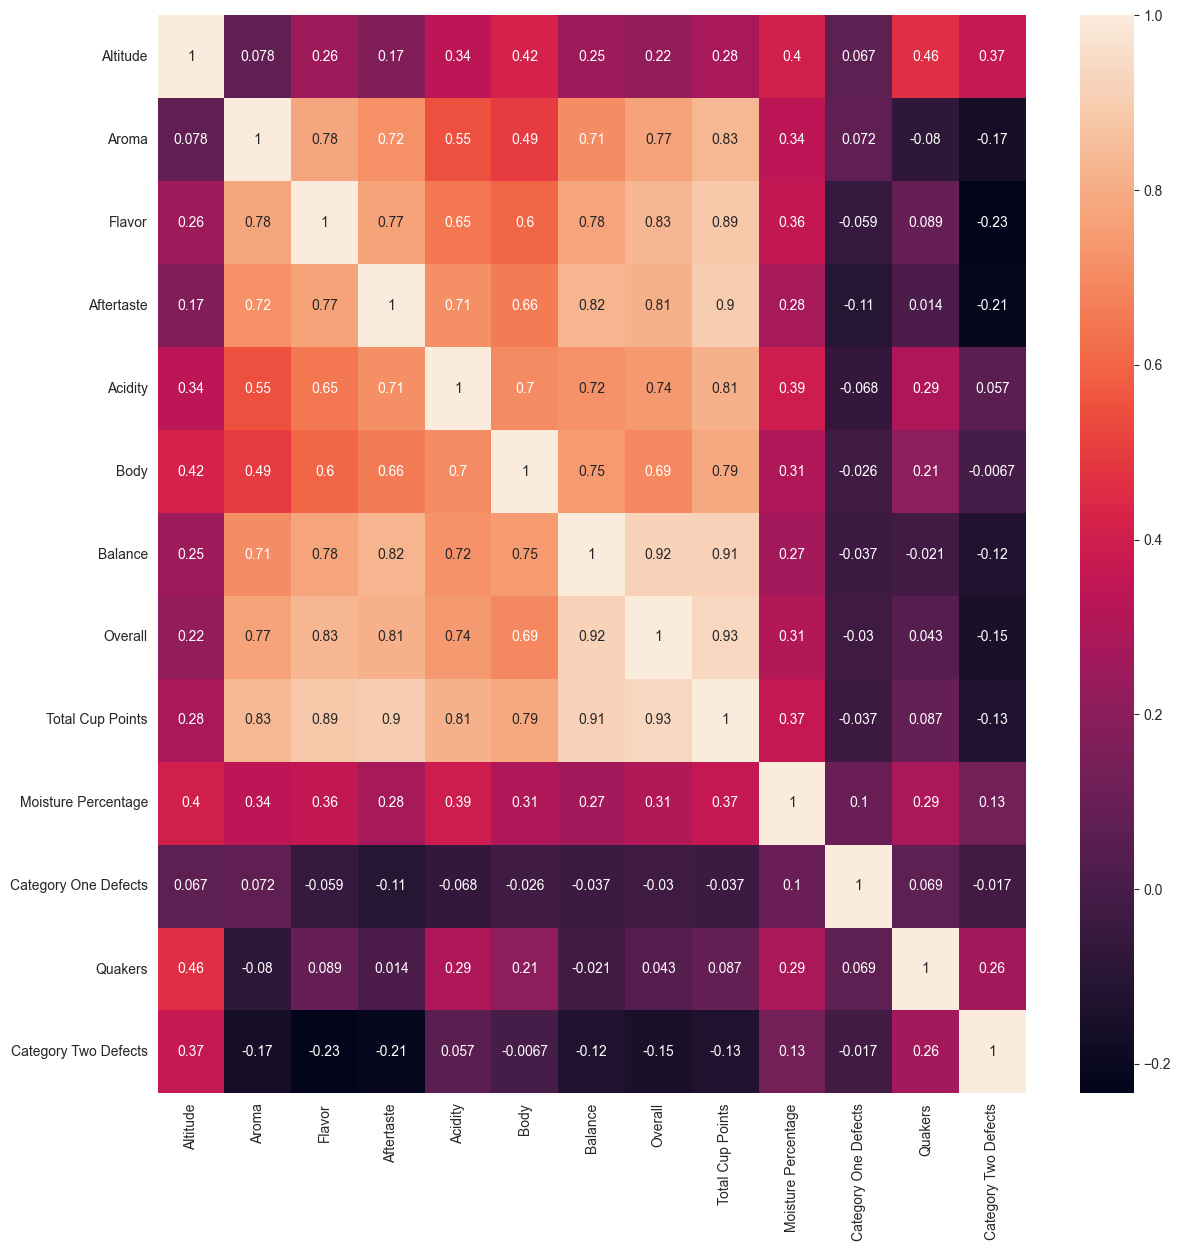

In [47]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
heatmap = sns.heatmap(sub_country.corr(), annot = True, ax = ax)

It's interesting to see that in some cases, correlations have worsened with this country subset. This could be due to the fact that we're working with much smaller data here, but for example the correlation between all the tasting notes and the total cup points have worsened slightly. 

However, in other cases, correlation has improved. For example, the correlation between all the tasting notes and the total cup points in relation with moisture percentage. I'd like to look at the correlation matrix of the remaining countries to see what it looks like.

In [49]:
# Create a subset of the remaining countries

df_country_alt = df[~df['Country of Origin'].str.contains('Ethiopia|Tanzania, United Republic Of|Guatemala|Taiwan')]

In [50]:
df_country_alt

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Diego Samuel Bermudez,1,35 kg,2021 / 2022,2022-09-21,...,10.0,8.58,89.33,11.8,0,0,green,3,"September 21st, 2023",High Rating
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,WU TAO CHI,19,25 kg,2021 / 2022,2022-11-15,...,10.0,8.33,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",High Rating
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Santa Maria de Dota,1,22 kg,2022,2022-09-21,...,10.0,8.25,87.17,11.8,0,0,green,0,"September 21st, 2023",High Rating
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Camilo Merizalde,2,24 kg,2022,2023-03-06,...,10.0,8.25,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",High Rating
14,Colombia,La Gaitania,Taiwan Coffee Laboratory,1850.0,tolima,Josue Enciso Suarez,70,35 kg,2021 / 2022,2022-11-15,...,10.0,8.00,86.17,10.6,0,0,green,0,"November 15th, 2023",High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Brazil,Fazenda Conquista,Ipanema Coffees,950.0,Sul de Minas,Ipanema Coffees,2240,60 kg,2022 / 2023,2023-02-02,...,10.0,7.08,80.08,11.4,0,0,green,4,"February 2nd, 2024",Low Rating
203,Nicaragua,Finca San Felipe,Exportadora Atlantic S.A,1200.0,Matagalpa,Exportadora Atlantic S.A.,300,30 kg,2022 / 2023,2023-03-03,...,10.0,7.08,80.00,10.4,0,2,green,12,"March 2nd, 2024",Low Rating
204,Laos,-,Marubeni Corporation,1300.0,Bolaven Plateau,"LAO MINH TIEN COFFEE SOLE CO.,LTD",343,60 kg,2021 / 2022,2022-11-11,...,10.0,7.00,79.67,11.6,0,9,green,11,"November 11th, 2023",Low Rating
205,El Salvador,"Rosario de Maria II, Area de La Pila",Aprentium Enterprises LLC,1200.0,"Volcan de San Vicente, La Paz, El Salvador",Roselia Yglesias,1,2 kg,2023,2023-03-08,...,10.0,6.83,78.08,11.0,0,12,blue-green,13,"March 7th, 2024",Low Rating


In [51]:
df_country_alt['Country of Origin'].value_counts(dropna=False)

Country of Origin
Colombia                  16
Honduras                  13
Thailand                  12
Costa Rica                 8
Brazil                     8
El Salvador                7
Nicaragua                  7
United States (Hawaii)     5
Mexico                     4
Peru                       4
Vietnam                    4
Uganda                     3
Laos                       3
Panama                     2
Kenya                      2
Indonesia                  1
Madagascar                 1
Myanmar                    1
Name: count, dtype: int64

In [52]:
# Create a subset from df_country_alt for the heatmap

sub_country_alt = df_country_alt[['Altitude','Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall','Total Cup Points','Moisture Percentage', 'Category One Defects','Quakers', 'Category Two Defects']]

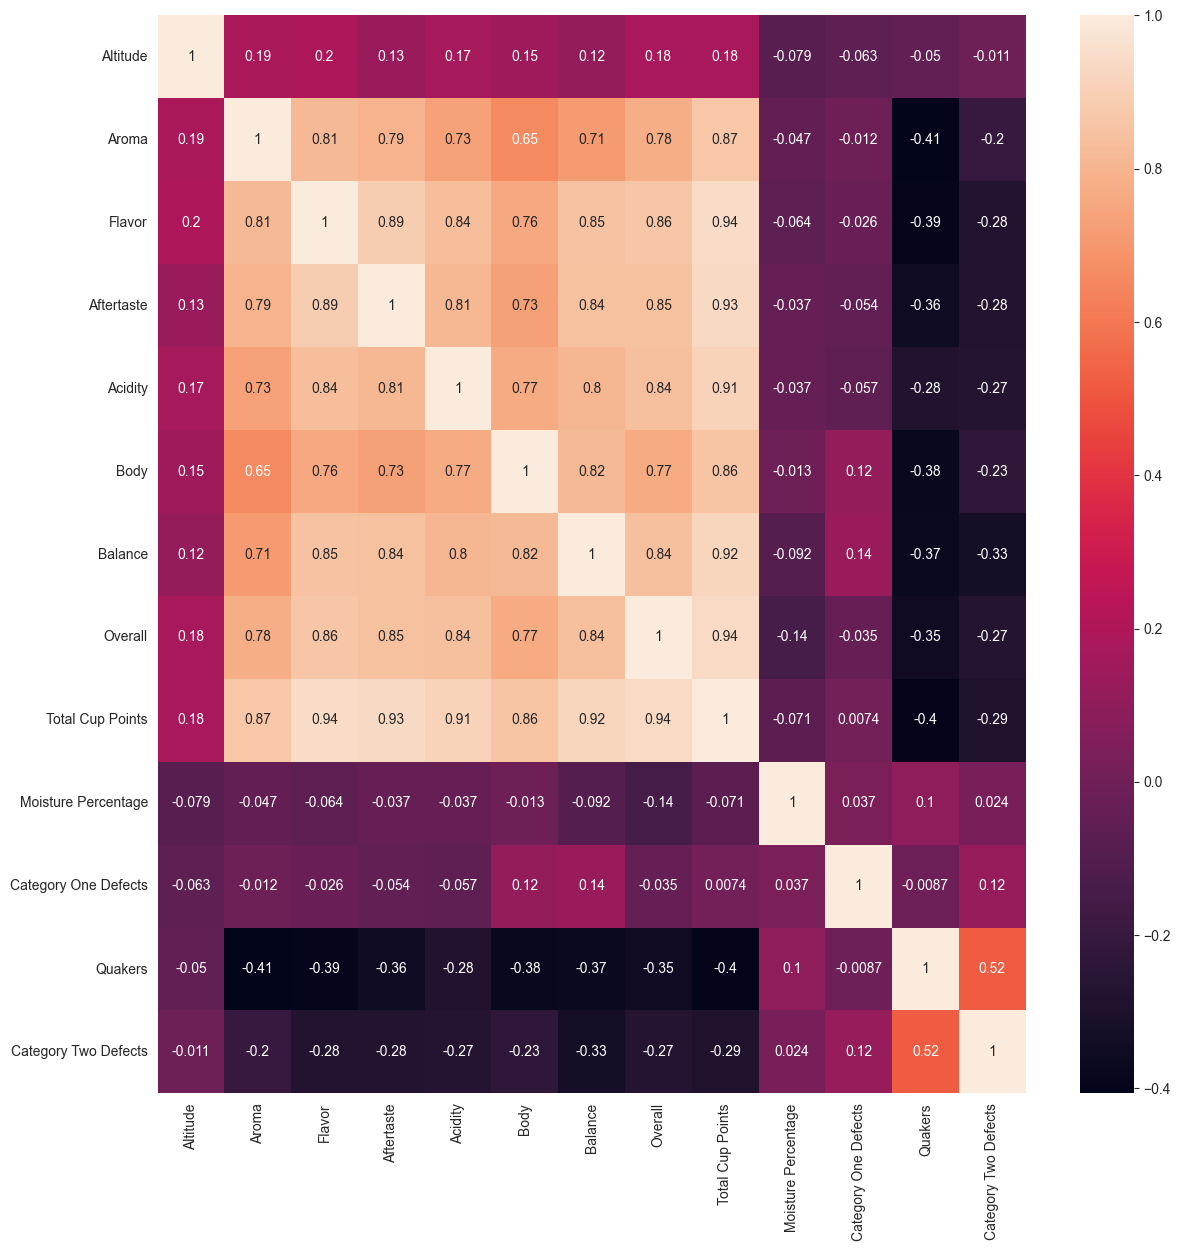

In [53]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(14,14))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
heatmap = sns.heatmap(sub_country_alt.corr(), annot = True, ax = ax)

Another interesting result here. The correlations seen in the remaining countries dataframe are almost opposite those in the top countries dataframe. The correlations between the tasting notes and the total cup points are higher. The correlations between the tasting notes, the total cup points and the moisture percentage are a lot lower, even lower than the correlation matrix of the entire dataframe.

#### Creating Scatterplots

I would like to see if altitude any moisture percentage have any stronger correlations in the top countries subset.

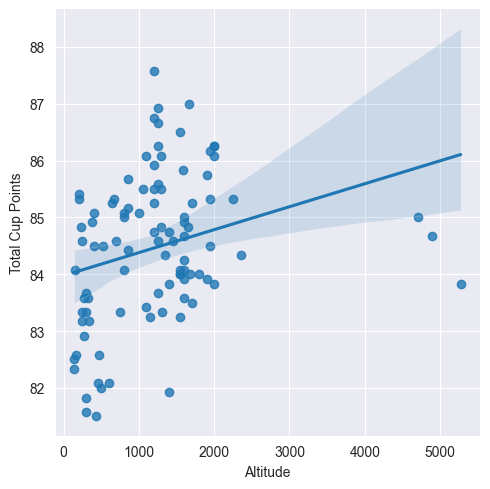

In [54]:
# Create a scatterplot for the "altitude" and "total cup points" columns in seaborn

sns.lmplot(x = 'Altitude', y = 'Total Cup Points', data = df_country)

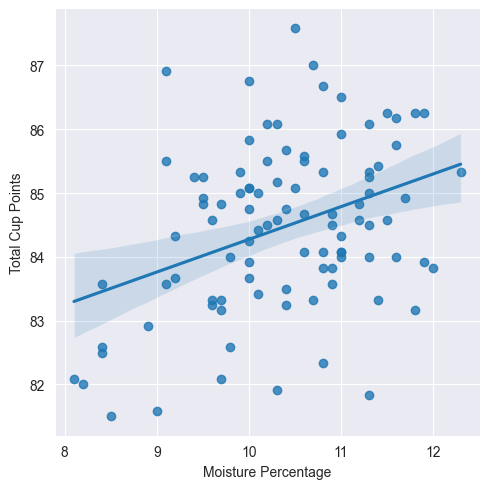

In [56]:
# Create a scatterplot for the "moisture percentage" and "total cup points" columns in seaborn

sns.lmplot(x = 'Moisture Percentage', y = 'Total Cup Points', data = df_country)

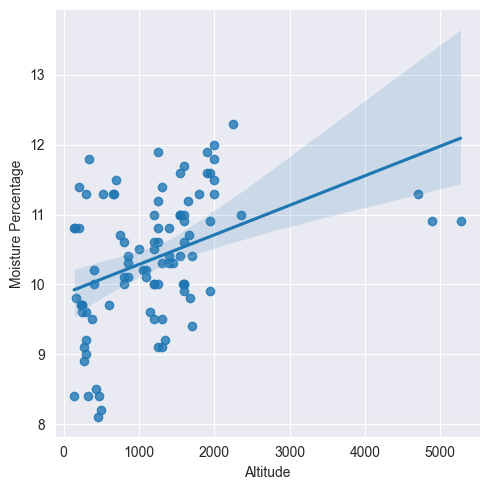

In [58]:
# Create a scatterplot for the "altitude" and "moisture percentage" columns in seaborn

sns.lmplot(x = 'Altitude', y = 'Moisture Percentage', data = df_country)

Some interesting insights here that will be worth exploring with linear regression and clustering. In these top countries, do more physical conditions such as altitude and moisture percentage play a bigger role?

#### Pair Plots

In [60]:
# Create a new subset to use for pair plots

sub_2 = df_country[['Altitude','Aroma', 'Flavor','Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall','Total Cup Points','Moisture Percentage', 'Category One Defects','Quakers', 'Category Two Defects']]

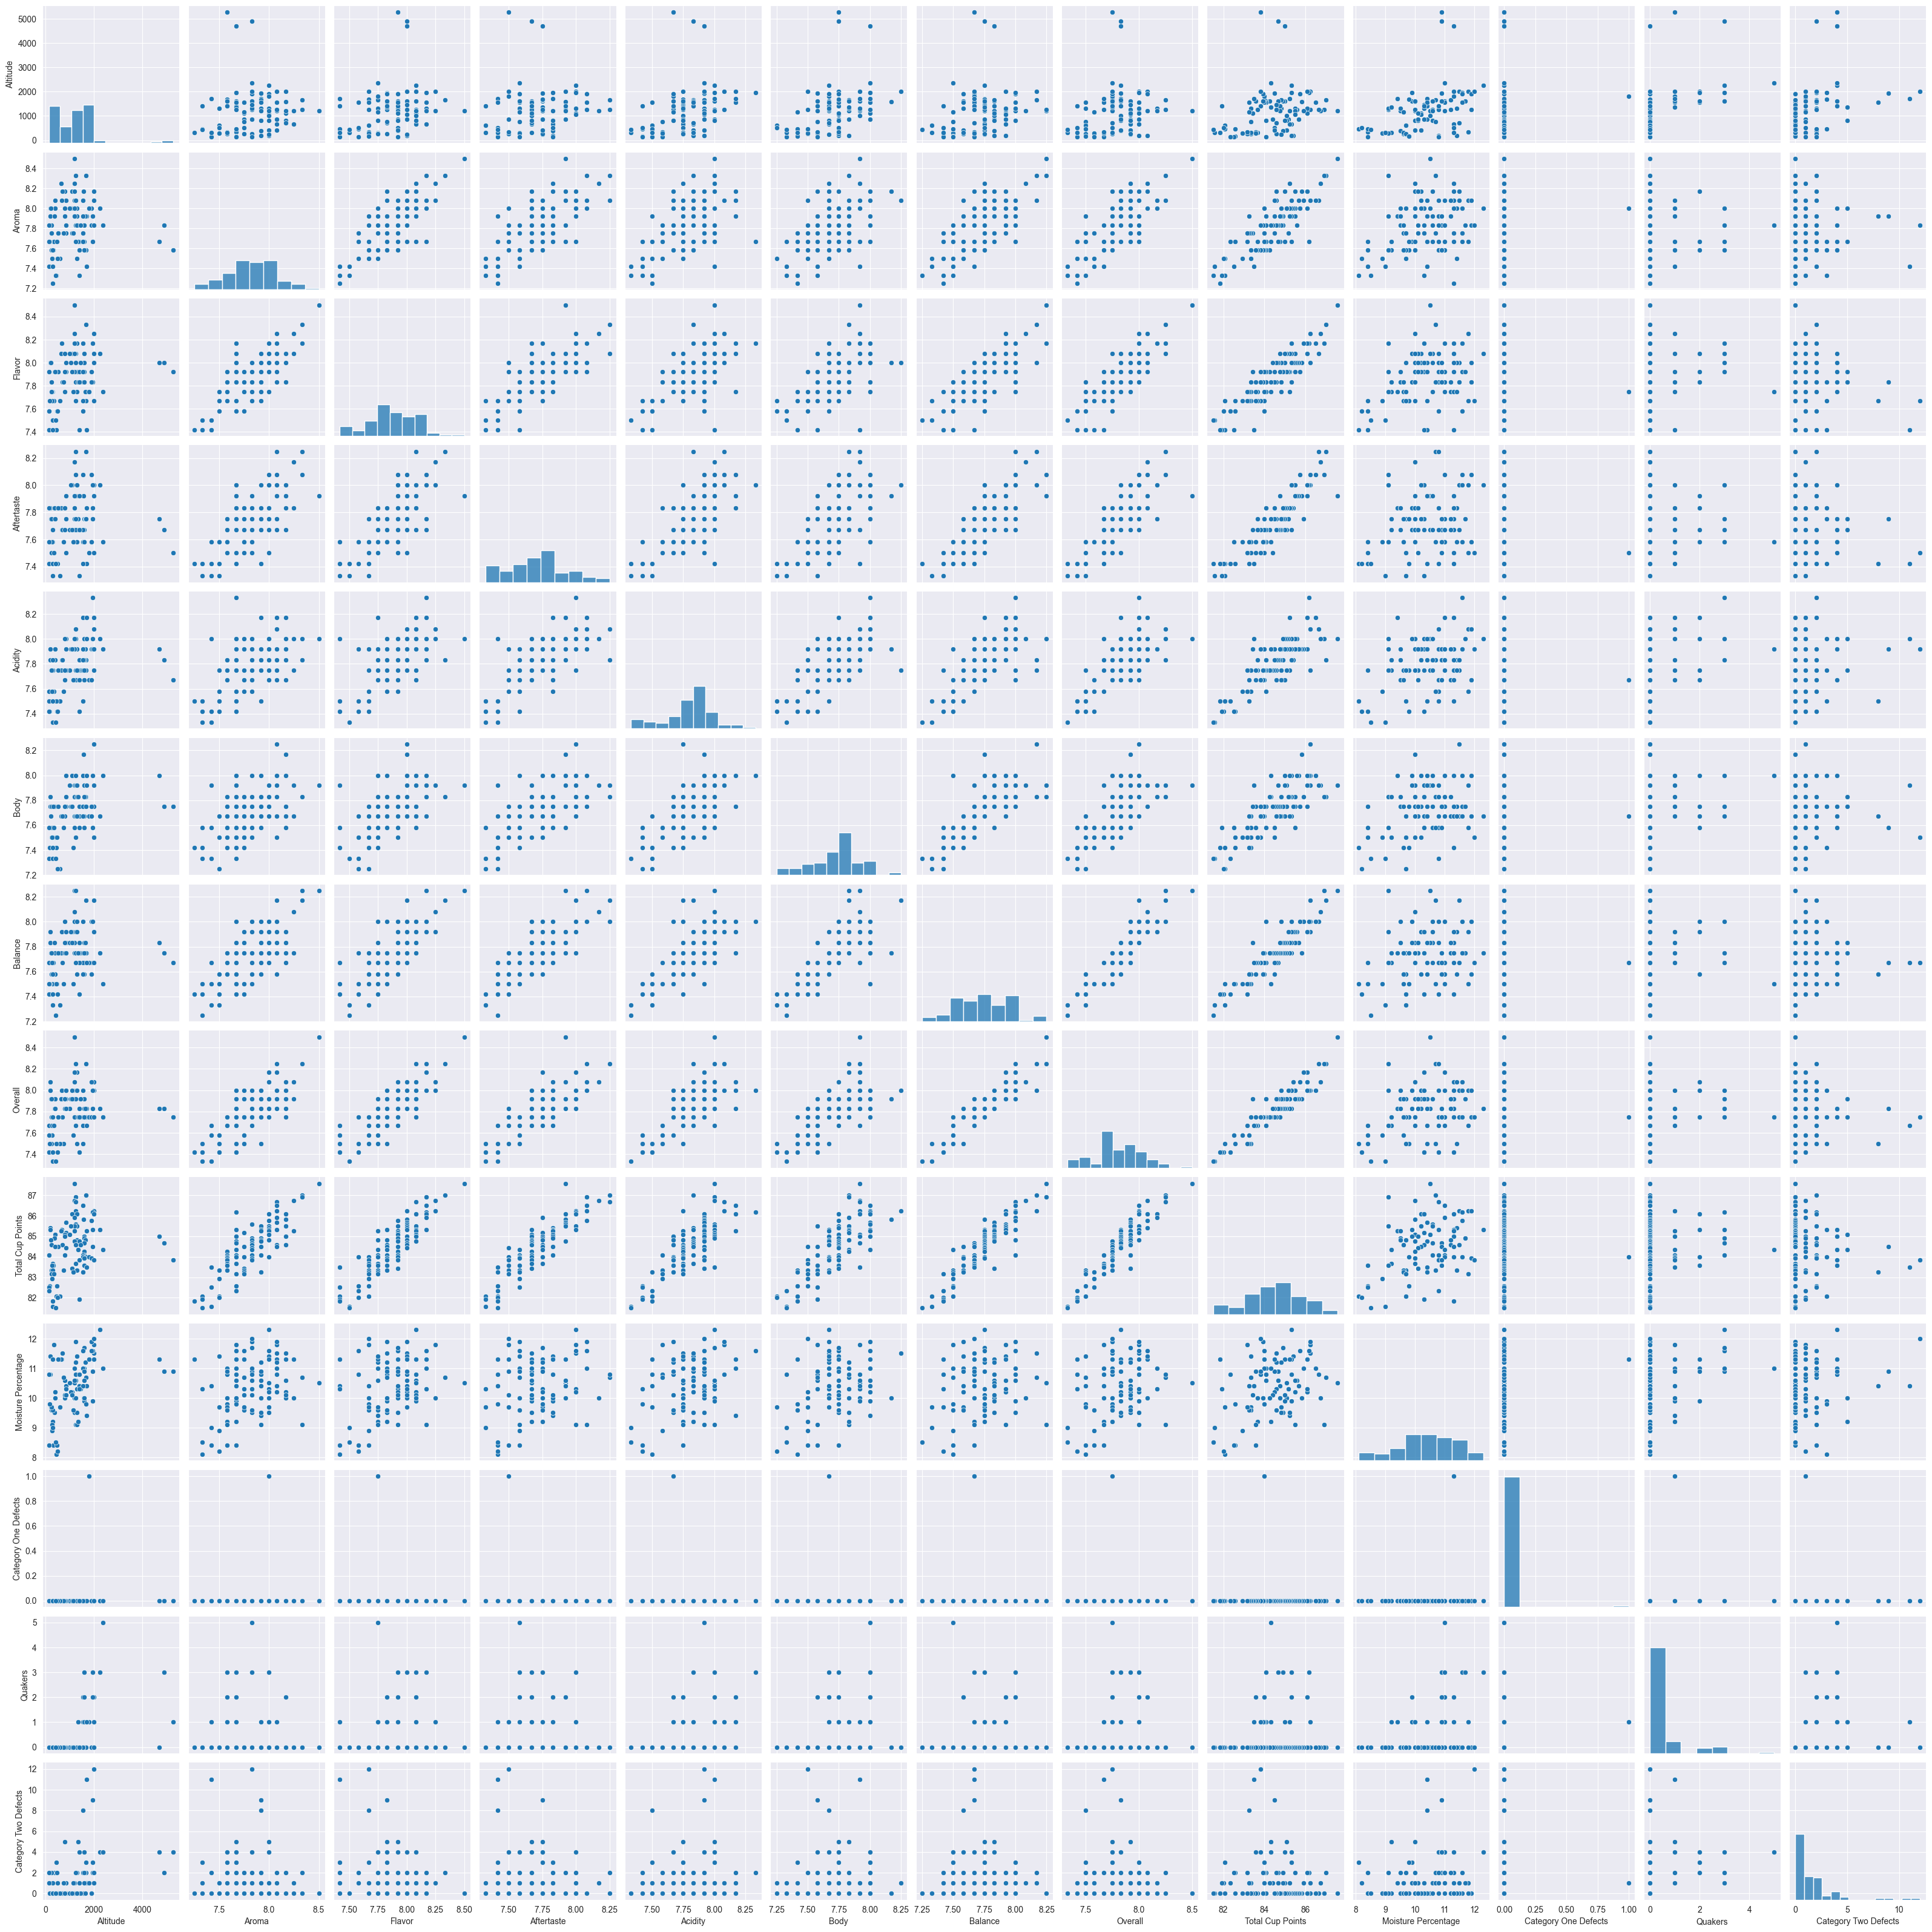

In [61]:
# Create pair plots of our subset

g = sns.pairplot(sub_2)

Wow, this is really interesting. The linear relationships we saw in the pair plots of the whole dataset are way less obvious in this top country subset (namely in the tasting notes vs total cup points correlations). And relationships that didn't exist at all before, such as tasting notes/total cup points against moisture percentage now show a bit of a correlation. Cluster analysis will be very interesting indeed with this subset.

#### Categorical Plots

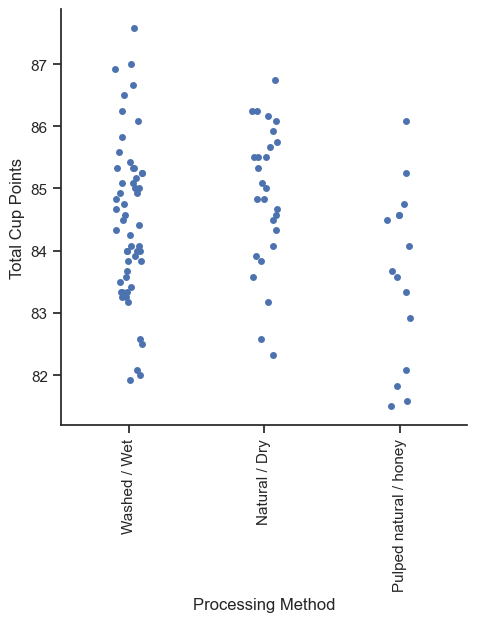

In [63]:
# Create a categorical plot in seaborn using the rating categories created above vs processing method with the top country subset

sns.set(style="ticks")
g1 = sns.catplot(x='Processing Method', y='Total Cup Points', data=df_country, height=5, width=5)
plt.xticks(rotation=90)
g1.set_axis_labels("Processing Method", "Total Cup Points") 

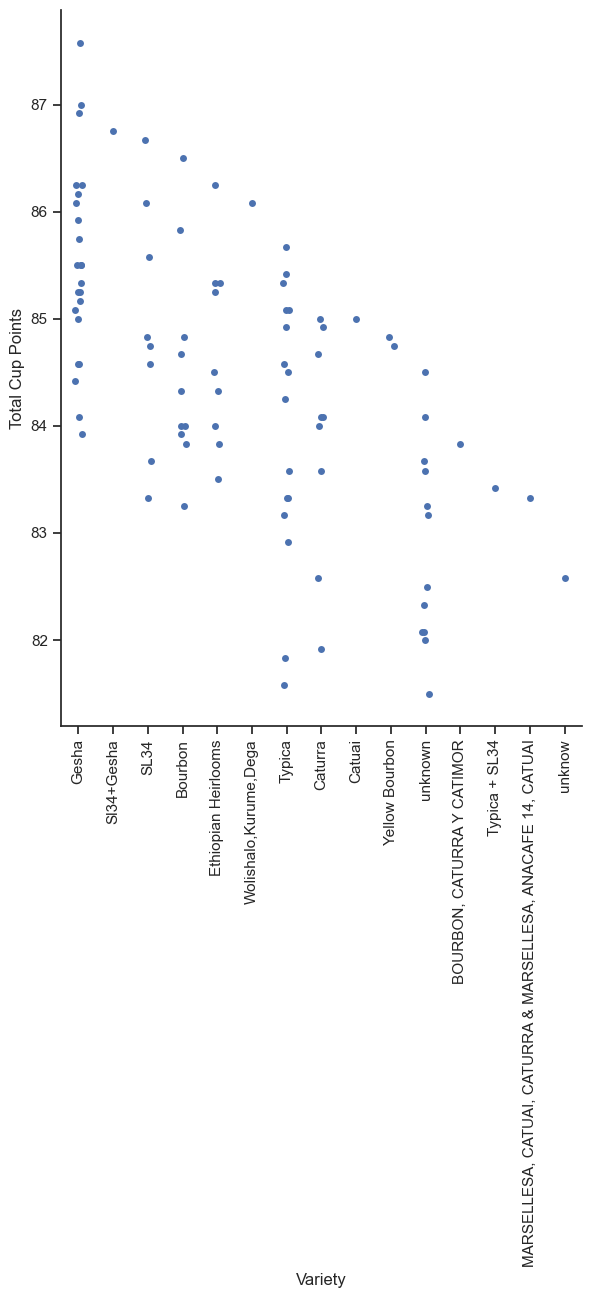

In [64]:
# Create a categorical plot in seaborn using the rating categories created above vs variety

sns.set(style="ticks")
g1 = sns.catplot(x='Variety', y='Total Cup Points', data=df_country, height=8, width=10)
plt.xticks(rotation=90)
g1.set_axis_labels("Variety", "Total Cup Points") 

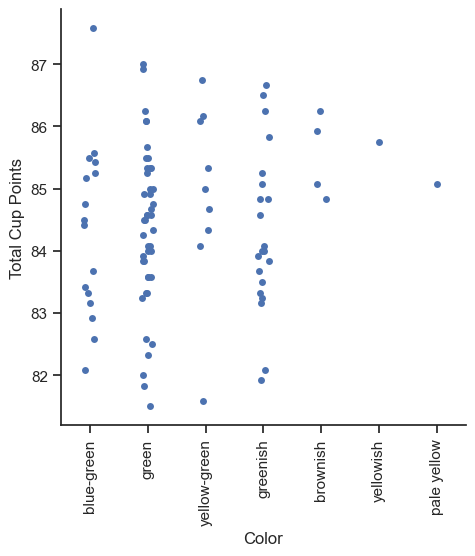

In [65]:
# Create a categorical plot in seaborn using the rating categories created above vs color

sns.set(style="ticks")
g1 = sns.catplot(x='Color', y='Total Cup Points', data=df_country)
plt.xticks(rotation=90)
g1.set_axis_labels("Color", "Total Cup Points") 

#### Exploring Averages

I want to look at the averages within the top country subset.

In [66]:
# Find the averages and count of variety

variety_avg_country = df_country.groupby('Variety')['Total Cup Points'].agg(['mean', 'count', 'std'])
variety_avg_country

,mean,count,std
Variety,,,
"BOURBON, CATURRA Y CATIMOR",83.830000,1,NaN
Bourbon,84.516000,10,0.987749
Catuai,85.000000,1,NaN
Caturra,83.870000,9,1.041345
Ethiopian Heirlooms,84.702222,9,0.891807
Gesha,85.525217,23,0.924135
"MARSELLESA, CATUAI, CATURRA & MARSELLESA, ANACAFE 14, CATUAI",83.330000,1,NaN
SL34,84.936250,8,1.139222
Sl34+Gesha,86.750000,1,NaN


Test to see if Gesha is better than any other varieties.

In [76]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Variety'] == 'Gesha'],
    df_country['Total Cup Points'][df_country['Variety'] == 'SL34'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 1.3190836218634594
P-value: 0.21545186469540087


In [80]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Variety'] == 'Gesha'],
    df_country['Total Cup Points'][df_country['Variety'] == 'Yellow Bourbon'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 3.7357966332421104
P-value: 0.0010817932414210673


In [79]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Variety'] == 'Gesha'],
    df_country['Total Cup Points'][df_country['Variety'] == 'Ethiopian Heirlooms'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 2.323136549692683
P-value: 0.03447304456512994


In [81]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Variety'] == 'Gesha'],
    df_country['Total Cup Points'][df_country['Variety'] == 'Bourbon'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 2.7498350182362317
P-value: 0.014122580115150489


#### Variety Test Results

Gesha seems to be better than most beans other than SL34. Which makes sense why Gesha+SL34 would be the highest rated variety.

In [67]:
# Find the averages and count of processing method

processing_avg_country = df_country.groupby('Processing Method')['Total Cup Points'].agg(['mean', 'count', 'std'])
processing_avg_country

,mean,count,std
Processing Method,,,
Natural / Dry,84.888148,27,1.141565
Pulped natural / honey,83.620667,15,1.404699
Washed / Wet,84.490185,54,1.280082


I want to perform some testing here to see if any of these methods are better than the other statistically.

In [69]:
# Perform ANOVA
f_statistic, p_value = f_oneway(
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Natural / Dry'],
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Pulped natural / honey'],
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Washed / Wet'],
)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 4.877787483427596
P-value: 0.009671777604956674


The p-value shows us that there is indeed some variance out of these three. We will perform t-tests to see which pairs stand out.

In [70]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Natural / Dry'],
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Pulped natural / honey'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 2.9890542945412446
P-value: 0.006300823697972772


In [71]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Natural / Dry'],
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Washed / Wet'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: 1.4193951805507463
P-value: 0.1611575773933452


In [72]:
# Perform t-test
t_statistic, p_value = ttest_ind(
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Pulped natural / honey'],
    df_country['Total Cup Points'][df_country['Processing Method'] == 'Washed / Wet'],
    equal_var=False)  # Assuming unequal variances

# Print the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

T-statistic: -2.161071118111099
P-value: 0.042443730360156064


#### Processing Method Test Results

Our ANOVA and t-tests show that there is out of the three processing methods, natural/dry and washed/wet are most closely related in terms of means, edging out pulped natural/honey in this case.

In [68]:
# Find the averages and count of color

color_avg_country = df_country.groupby('Color')['Total Cup Points'].agg(['mean', 'count', 'std'])
color_avg_country

,mean,count,std
Color,,,
blue-green,84.333750,16,1.418205
brownish,85.520000,4,0.673944
green,84.362500,44,1.276655
greenish,84.312857,21,1.309420
pale yellow,85.080000,1,NaN
yellow-green,84.887778,9,1.528641
yellowish,85.750000,1,NaN


In [84]:
# Perform ANOVA
f_statistic, p_value = f_oneway(
    df_country['Total Cup Points'][df_country['Color'] == 'brownish'],
    df_country['Total Cup Points'][df_country['Color'] == 'yellow-green'],
    df_country['Total Cup Points'][df_country['Color'] == 'green'],
    df_country['Total Cup Points'][df_country['Color'] == 'blue-green'],
)

# Print the results
print(f'F-statistic: {f_statistic}')
print(f'P-value: {p_value}')

F-statistic: 1.2944820425058239
P-value: 0.2832835221237106


Our ANOVA test shows us that there isn't enough statistical variance between these beans in terms of quality.

# 4. Box Plots

In [87]:
# Create a box and whisker plot of total cup points by processing Method

fig = px.box(df_country, x='Processing Method', y='Total Cup Points', title='Box Plot of Total Cup Points grouped by Processing Method')
fig.show()

In [89]:
# Create a subset of the 9 top variety from our averages

df_country_var = df_country[df_country['Variety'].str.contains('Sl34+Gesha|Wolishalo,Kurume,Dega|Gesha|Catuai|SL34|Yellow Bourbon|Ethiopian Heirlooms|Bourbon|Typica')]
df_country_var

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN TANZANIA LTD,1550.0,KILIMANJARO,DORMAN TANZANIA LTD,320,60 kg,2022 / 2023,2023-01-03,...,10.0,7.50,83.25,10.4,0,0,greenish,8,"January 3rd, 2024",Middle Rating
134,Taiwan,蜜多莊園,Taiwu Coffee Cooperative,250.0,新竹縣,張新榮,1,16 kg,2021 / 2022,2023-01-06,...,10.0,7.50,83.17,9.7,0,0,greenish,2,"January 6th, 2024",Middle Rating
140,Taiwan,樹橋窩莊園,Taiwu Coffee Cooperative,275.0,新竹縣,王維書,1,12 kg,2021 / 2022,2023-01-06,...,10.0,7.58,82.92,8.9,0,0,blue-green,0,"January 6th, 2024",Middle Rating
181,Taiwan,阿拉思家,Taiwu Coffee Cooperative,300.0,桃園市,李秀圓,1,6 kg,2021 / 2022,2023-01-06,...,10.0,7.42,81.83,11.3,0,0,green,0,"January 6th, 2024",Low Rating


In [90]:
# Create a box and whisker plot of total cup points by Variety from our variety subset

fig = px.box(df_country_var, x='Variety', y='Total Cup Points', title='Box Plot of Total Cup Points grouped by Variety')
fig.show()

In [91]:
df_country

,Country of Origin,Farm Name,Company,Altitude,Region,Producer,Number of Bags,Bag Weight,Harvest Year,Grading Date,...,Uniformity,Overall,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Rating Category
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,曾福森,1,80 kg,2021 / 2022,2022-11-15,...,10.0,8.50,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",High Rating
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Emilio Antonio Medina Garcia,5,30 kg,2022,2022-11-15,...,10.0,8.25,87.00,10.7,0,0,green,2,"November 15th, 2023",High Rating
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,黃保錫,1,27 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.92,9.1,0,0,green,0,"November 15th, 2023",High Rating
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,莊家榮,1,90 kg,2021 / 2022,2022-11-15,...,10.0,8.08,86.75,10.0,0,0,yellow-green,1,"November 15th, 2023",High Rating
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,鍾旭亮,1,30 kg,2021 / 2022,2022-11-15,...,10.0,8.25,86.67,10.8,0,0,greenish,0,"November 15th, 2023",High Rating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,Taiwan,拉拉山祖嵐咖啡莊園,Taiwu Coffee Cooperative,500.0,桃園市,宗素霞,1,20 kg,2021 / 2022,2023-01-06,...,10.0,7.42,82.00,8.2,0,0,green,1,"January 6th, 2024",Middle Rating
180,Guatemala,MULTIPLE SMALLHOLDER FARMS,"HARU International Corp, 守成咖啡",1400.0,Antigua,La Minita,540,30 kg,2022,2022-11-03,...,10.0,7.42,81.92,10.3,0,0,greenish,1,"November 3rd, 2023",Low Rating
181,Taiwan,阿拉思家,Taiwu Coffee Cooperative,300.0,桃園市,李秀圓,1,6 kg,2021 / 2022,2023-01-06,...,10.0,7.42,81.83,11.3,0,0,green,0,"January 6th, 2024",Low Rating
188,Taiwan,橫鹿,Taiwu Coffee Cooperative,300.0,新北市,呂星輝,1,100 kg,2021 / 2022,2023-01-06,...,10.0,7.33,81.58,9.0,0,0,yellow-green,0,"January 6th, 2024",Low Rating
